<a href="https://colab.research.google.com/github/Guidong99/Colab/blob/main/833hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from math import sqrt
import pandas as pd
from numpy import dot
from numpy import transpose as t
from matplotlib import pyplot as plt
from scipy import integrate
from math import exp
import pandas as pd

In [ ]:
x=[0.5,0.5]
u=[x]
T=[[-1,0.5],[-0.5,-1]]
sigma=[0.2,0.5]
dt=0.25
time=list(range(100))
for i in time:
  x=u[-1]
  dw=np.random.normal(0,sqrt(dt),1)
  u.append(list(x+dt*dot(T,x)+dw*sigma))
x1,x2=[],[]
for i in range(len(u)):
  x1.append(u[i][0])
  x2.append(u[i][1])


Text(0.5, 0, 'time')

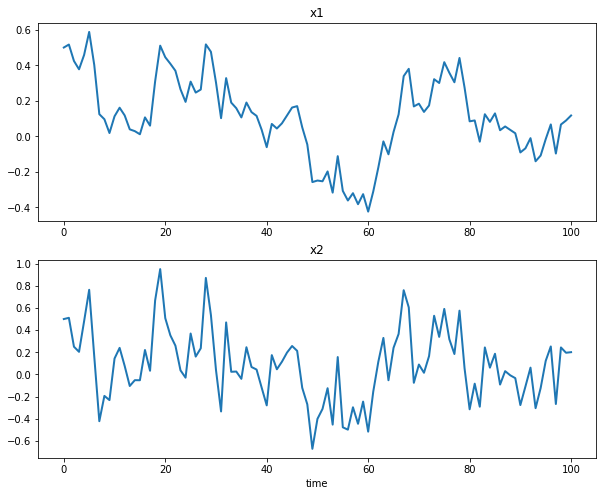

In [ ]:
fig=plt.figure(figsize=(10,8))
ax1,ax2=plt.subplot(2,1,1),plt.subplot(2,1,2)
ax1.plot(x1,lw=2)
ax2.plot(x2,lw=2)
ax1.set_title('x1')
ax2.set_title('x2')
plt.xlabel('time')

In [ ]:
dt=0.25
T=np.array([[-1,0.5],[-0.5,-1]])
F=np.identity(2)+dt*T
U=[np.array([0.5,0.5])]
R=[[[0,0],[0,0]]]
# sigma=np.random.multivariate_normal([0,0],[[0.04*dt,0],[0,0.25*dt]])
# sigma0=np.random.multivariate_normal([0,0],[[0.04,0],[0,0.4]])
G=[[2,0],[0,2]]

U1,R1=[np.array([0.5,0.5])],[[[0,0],[0,0]]]
for i in range(100):
  u=U[-1]
  r=R[-1]
  u1=F@u
  r1=F@r@t(F)+[[0.04*dt,0],[0,0.25*dt]]
  v=G@u+np.random.multivariate_normal([0,0],[[0.04,0],[0,0.04]])
  k=r1@t(G)@np.linalg.inv(G@r1@t(G)+[[0.04,0],[0,0.04]])
  u=u1+k@(v-G@u1)
  r=(np.identity(2)-k@G)@r1
  U1.append(u1)
  R1.append(r1)
  U.append(u)
  R.append(r)


def get_mean(lt,ind):
  s=[]
  for i in range(len(lt)):
    s.append(lt[i][0])
  return s

def get_var(lt,ind):
  s=[]
  for i in range(len(lt)):
    s.append(lt[i][ind][ind])
  return s




In [ ]:
x1=pd.DataFrame()
x1['posterior_mean']=get_mean(U,0)
x1['posterior_var']=get_var(R,0)
x1['prior_mean']=get_mean(U1,0)
x1['prior_var']=get_var(R1,0)

x2=pd.DataFrame()
x2['posterior_mean']=get_mean(U,1)
x2['posterior_var']=get_var(R,1)
x2['prior_mean']=get_mean(U1,1)
x2['prior_var']=get_var(R1,1)


,posterior_mean,posterior_var,prior_mean,prior_var
0,0.500000,0.000000,0.500000,0.000000
1,0.405968,0.005000,0.437500,0.010000
2,0.456921,0.005642,0.363285,0.012947
3,0.427552,0.005710,0.402343,0.013313
4,0.454942,0.005717,0.362037,0.013351
...,...,...,...,...
96,-0.024677,0.005718,-0.054861,0.013356
97,-0.103187,0.005718,-0.039365,0.013356
98,-0.104219,0.005718,-0.100123,0.013356
99,-0.136136,0.005718,-0.119157,0.013356


##x1图像

Text(0.5, 1.0, 'prior_var')

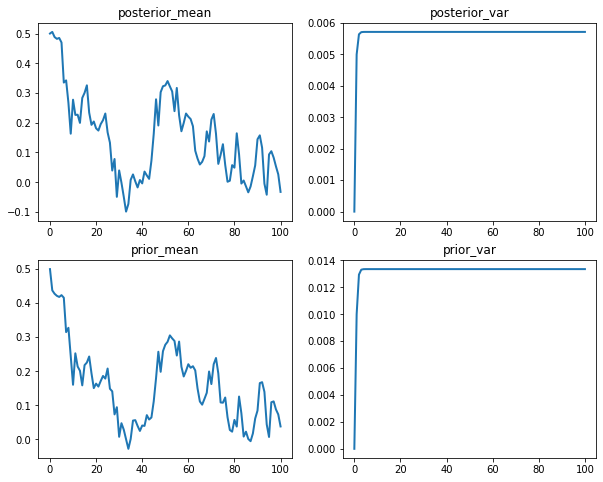

In [ ]:
fig=plt.figure(figsize=(10,8))
ax1,ax2,ax3,ax4=plt.subplot(2,2,1),plt.subplot(2,2,2),plt.subplot(2,2,3),plt.subplot(2,2,4)
ax1.plot(x1['posterior_mean'],lw=2)
ax2.plot(x1['posterior_var'],lw=2)
ax3.plot(x1['prior_mean'],lw=2)
ax4.plot(x1['prior_var'],lw=2)
ax1.set_title('posterior_mean')
ax2.set_title('posterior_var')
ax3.set_title('prior_mean')
ax4.set_title('prior_var')
# plt.xlabel('time')

##x2图像

Text(0.5, 1.0, 'prior_var')

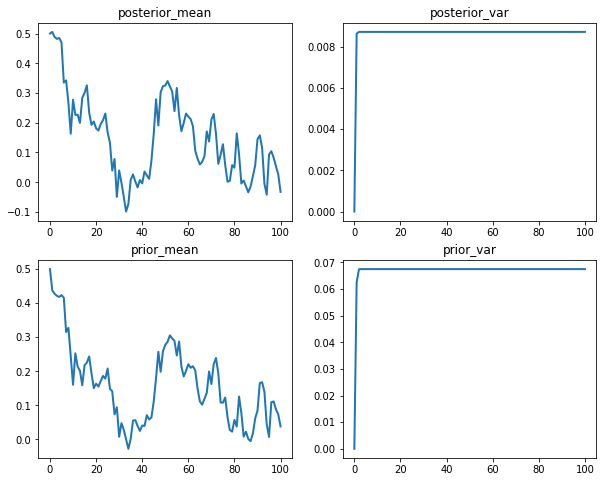

In [ ]:
fig=plt.figure(figsize=(10,8))
ax1,ax2,ax3,ax4=plt.subplot(2,2,1),plt.subplot(2,2,2),plt.subplot(2,2,3),plt.subplot(2,2,4)
ax1.plot(x2['posterior_mean'],lw=2)
ax2.plot(x2['posterior_var'],lw=2)
ax3.plot(x2['prior_mean'],lw=2)
ax4.plot(x2['prior_var'],lw=2)
ax1.set_title('posterior_mean')
ax2.set_title('posterior_var')
ax3.set_title('prior_mean')
ax4.set_title('prior_var')